<a href="https://colab.research.google.com/github/Damicode2/code5/blob/main/RCO_CURVE_IN_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ROC Curve in python

## Load the datasets and get the shape

In [2]:
from sklearn import datasets
import numpy as np

In [29]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [30]:
X.shape, Y.shape

((150, 4), (150,))

#  Data Spliting

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [32]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((120, 4), (30, 4), (120,), (30,))

# Building Classification model

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [48]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [66]:
r = LogisticRegression()
r.fit(X_train, Y_train)

LogisticRegression()

In [49]:
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

## Prediction Prob

In [67]:
r_probs = r.predict_proba(X_test)
rf_probs = rf.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)

# Computing AUROC and ROC curve values

In [68]:
from sklearn.metrics import roc_curve, roc_auc_score

## Calculate AUROC

In [69]:
r_auc = roc_auc_score(Y_test, r_probs, multi_class='ovr', average='macro')
rf_auc = roc_auc_score(Y_test, rf_probs, multi_class='ovr', average='macro')
nb_auc = roc_auc_score(Y_test, nb_probs, multi_class='ovr', average='macro')

In [70]:
print('Logistic Regression: AUROC = %.2f' % (r_auc))
print('Random Forest: AUROC = %.2f' % (rf_auc))
print('Naive Bayes: AUROC = %.2f' % (nb_auc))

Logistic Regression: AUROC = 1.00
Random Forest: AUROC = 1.00
Naive Bayes: AUROC = 1.00


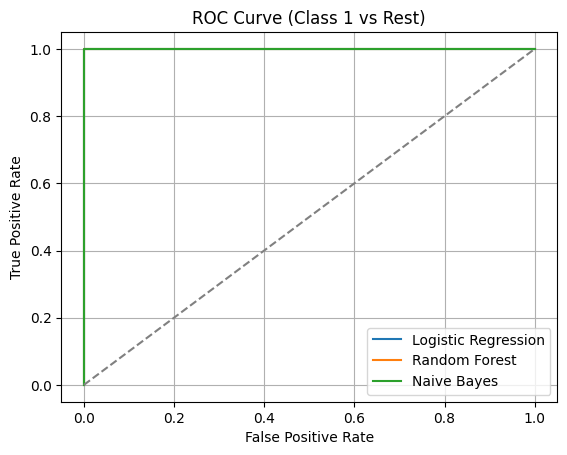

In [77]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Choose class 1 (or 0 or 2 — depending on your case)
class_id = 1

# Convert Y_test to binary: 1 if it's the class, 0 otherwise
from sklearn.preprocessing import label_binarize
Y_test_bin = label_binarize(Y_test, classes=[0, 1, 2])[:, class_id]

# Get the predicted probabilities for class 1
r_probs_class = r_probs[:, class_id]
rf_probs_class = rf_probs[:, class_id]
nb_probs_class = nb_probs[:, class_id]

# Compute ROC curves
r_fpr, r_tpr, _ = roc_curve(Y_test_bin, r_probs_class)
rf_fpr, rf_tpr, _ = roc_curve(Y_test_bin, rf_probs_class)
nb_fpr, nb_tpr, _ = roc_curve(Y_test_bin, nb_probs_class)

# Plotting
plt.figure()
plt.plot(r_fpr, r_tpr, label="Logistic Regression")
plt.plot(rf_fpr, rf_tpr, label="Random Forest")
plt.plot(nb_fpr, nb_tpr, label="Naive Bayes")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Class 1 vs Rest)")
plt.legend()
plt.grid()
plt.show()


In [80]:
print('NB:%.2f' % nb_auc)

NB:1.00
